# Projeto de análise de venda de video games. 
No presente projeto vamos analisar o desempenho das vendas de video games, a base de dados possui é composta pelas seguintes colunas:<br>
**Rank**: numeração que vai de 1 a 16598;<br>
**Name**: nome dos jogos;<br>
**Platform**: plataforma dos jogos;<br>
**Year**: ano de lançamento do jogo;<br>
**Genre**: genero do jogo; <br>
**Publisher**: a empresa que publicou o jogo; <br> 
**NA_Sales**: vendas na América do Norte; <br>
**EU_Sales**: vendas na Europa; <br>
**JP_Sales**: vendas no Japão;<br>
**Other_Sales**: vendas em outros países; <br>
**Global_Sales**: total de vendas mundiais; <br><br><br>
Vamos importar as bibibliotecas necessárias, e base de dados utilizada para a análise. 

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [3]:
df = pd.read_csv('vgsales.csv')

Vamos obter algumas informação a respeito do tamanho da base de dados com o método **.info()**.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


# Trabalhando com dados Faltantes. 
Nota-se que há dados faltantes na base de dados que será alvo da análise, isso pode atrapalhar a análise exploratória dos dados. <br>
Vamos visualizar melhor aonde há a ausencia de dados. 

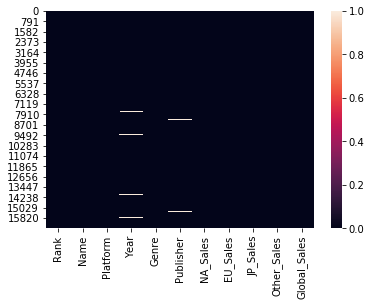

In [7]:
sns.heatmap(df.isnull())

Os pontos brancos mostram aonde não há dados. Para trata-los vamos utilizar o método **"fillna()"** do pandas, e assim completar as lacunas com as medianas dos valores.  

In [3]:
yearm = df.Year.median()
df.fillna(yearm, inplace=True)

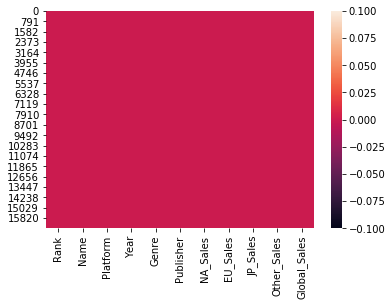

In [9]:
sns.heatmap(df.isnull())

Nota-se que não há mais pontos brancos, mostrando que não há mais dados faltantes. 

In [12]:
df.isnull().count()

Rank            16598
Name            16598
Platform        16598
Year            16598
Genre           16598
Publisher       16598
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

# Análise exploratória.

In [13]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Vamos visualizar graficamente os generos dos videos games. 

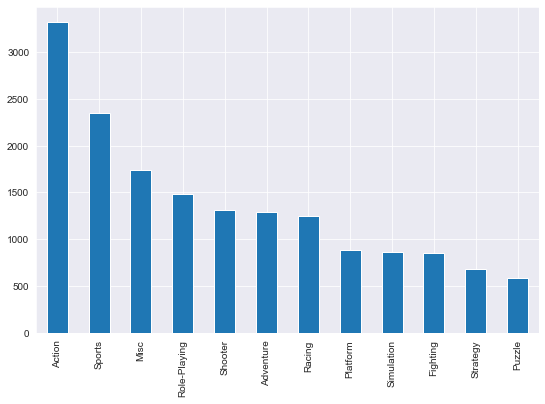

In [16]:
sns.set_style('darkgrid')
df['Genre'].value_counts().plot(kind='bar', figsize=(9,6))

Agora vamos analisar numéricamente estes dados, utilizando o método **"groupby()"**.

In [5]:
df.groupby('Genre').mean()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,7973.879071,2007.892642,0.264726,0.158323,0.048236,0.056508,0.528100
Adventure,11532.787714,2008.122084,0.082271,0.049868,0.040490,0.013072,0.185879
Fighting,7646.511792,2004.663915,0.263667,0.119481,0.103007,0.043255,0.529375
Misc,8561.847039,2007.254169,0.235906,0.124198,0.061967,0.043312,0.465762
Platform,6927.251693,2003.856659,0.504571,0.227573,0.147596,0.058228,0.938341
Puzzle,9627.381443,2005.276632,0.212680,0.087251,0.098471,0.021564,0.420876
Racing,7961.515612,2004.879904,0.287766,0.190865,0.045388,0.061865,0.586101
Role-Playing,8086.174731,2007.055108,0.219946,0.126384,0.236767,0.040060,0.623233
Shooter,7369.367939,2005.941985,0.444733,0.239137,0.029221,0.078389,0.791885


Nota-se que os games com melhores vendas na América do Norte (NA_Sales) são os jogos de gênero **"Plataform"**;<br>
Já na Europa, os jogos com melhor desempenho em vendas são os jogos de gênero **"Shooter"**:<br>
No Japão os jogos com melhor desempenho, são os jogos do gênero **"Role-Playing"**;<br>
Nos outros países, os games mais vendidos são do tipo **"Shooter"**;<br>
Com relação as vendas globais, o gênero de jogo que apresenta maior influencia, são os jogos do gênero **"Plataform"**. <br><br><br><br>
Vamos analisar agora, as empresa que publicaram estes games. 

In [7]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Wizard Video Games                 1
GameTek                            1
SSI                                1
Imax                               1
Gaga                               1
Name: Publisher, Length: 579, dtype: int64

Nota-se que há muitas empresa, logo iremos trabalhar apenas com as 3 maiores. 

In [27]:
df['Publisher'].value_counts().head(3)

Electronic Arts       1351
Activision             975
Namco Bandai Games     932
Name: Publisher, dtype: int64

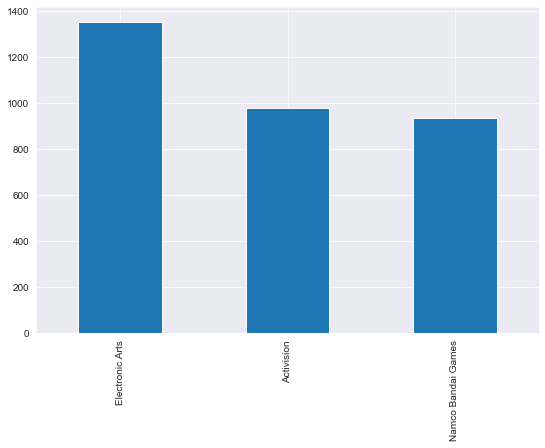

In [28]:
sns.set_style('darkgrid')
df['Publisher'].value_counts().head(3).plot(kind='bar', figsize=(9,6))

Vamos pegar a **"Electronic Arts"** e analisar em qual gêneros ela tem o melhor desempenho. 

In [15]:
df[df['Publisher']=='Electronic Arts'].groupby('Genre').mean()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,5899.038251,2007.131148,0.296448,0.240820,0.013607,0.080492,0.631366
Adventure,7743.769231,2004.615385,0.197692,0.126923,0.006154,0.033846,0.365385
Fighting,3841.358974,2004.589744,0.509744,0.224359,0.000769,0.071282,0.804872
Misc,6763.413043,2007.934783,0.324348,0.158696,0.000217,0.058696,0.542391
Platform,6826.562500,2006.125000,0.197500,0.159375,0.003125,0.046250,0.408125
Puzzle,4671.571429,2008.000000,0.380000,0.204286,0.000000,0.065714,0.650000
Racing,4830.880503,2004.628931,0.474969,0.322013,0.007547,0.112579,0.916792
Role-Playing,4531.400000,2009.114286,0.509143,0.325429,0.076000,0.097714,1.008571
Shooter,5062.992806,2007.446043,0.583813,0.403094,0.021079,0.130935,1.138561


Nota-se que na América do Norte, Europa, e em outros países, o gênero de maior sucesso foi o **"Shooter"**;<br>
Já no Japão, o gênero **"Role-Playing"** teve um melhor desempenho. E obviamente que o gênero que maios influenciou as vendas globais, foi o gênero de **"Shooter"**.

In [17]:
df[df['Publisher']=='Electronic Arts'].groupby('Genre').max()

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,,,,
Action,16416,Wing Commander III: Heart of the Tiger,XOne,2015.0,Electronic Arts,1.94,5.05,1.06,2.01,8.24
Adventure,16557,Xena: Warrior Princess,XB,2011.0,Electronic Arts,0.62,0.43,0.04,0.11,1.08
Fighting,11281,Warpath: Jurassic Park,XB,2011.0,Electronic Arts,1.33,1.16,0.01,0.26,1.94
Misc,16387,Zubo,X360,2011.0,Electronic Arts,1.93,1.18,0.01,0.35,2.99
Platform,13102,Ty the Tasmanian Tiger 2: Bush Rescue,XOne,2016.0,Electronic Arts,0.57,0.59,0.02,0.22,1.17
Puzzle,10926,We Love Katamari,Wii,2009.0,Electronic Arts,0.97,0.38,0.00,0.13,1.45
Racing,14598,The Simpsons: Road Rage,XOne,2016.0,Electronic Arts,3.27,3.02,0.11,1.68,7.20
Role-Playing,15332,Untold Legends: Dark Kingdom,XOne,2014.0,Electronic Arts,1.99,1.08,2.11,0.38,5.29
Shooter,16342,Viewpoint,XOne,2016.0,Electronic Arts,4.46,3.29,0.35,1.23,7.67


Estas são as melhores vendas da "Electronic Arts", em todos os gêneros;<br>
Note que o melhor jogo, no quesito números, está no gênero **"Action"**. 

Vamos realizar a mesma análise para as demais produtoras:<br><br>


In [20]:
df[df['Publisher']=='Activision'].groupby('Genre').mean()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,6932.600000,2007.903226,0.281581,0.129097,0.003484,0.044613,0.459129
Adventure,8504.600000,2007.960000,0.161600,0.034800,0.004000,0.016400,0.216800
Fighting,5959.142857,1998.142857,0.277143,0.108571,0.000000,0.021429,0.408571
Misc,5533.067961,2008.000000,0.472621,0.171165,0.000485,0.097767,0.743204
Platform,6120.383333,2005.466667,0.390833,0.130833,0.001167,0.033500,0.556667
Puzzle,10610.714286,2000.714286,0.111429,0.015714,0.021429,0.002857,0.151429
Racing,8491.594595,2006.527027,0.164595,0.049459,0.000541,0.018243,0.233919
Role-Playing,4253.243902,2006.804878,0.575122,0.448780,0.006341,0.110976,1.141220
Shooter,5388.974843,2008.308176,1.015031,0.620063,0.029182,0.221132,1.885975


Melhor venda na América do Norte: **"Role-Playing"**;<br>
Melhor venda na Euroa: **"Shooter"**;<br>
Melhor venda no Japão: **"Shooter"**;<br>
Melhor venda nos demais países: **"Shooter"**;<br>
Vendas globais: **"Shooter"**;<br><br><br>
**OBS**: Note que a no Japão a "Activision", possuiu um péssimo desempenho em comparação com os demais países. 

In [22]:
df[df['Publisher']=='Activision'].groupby('Genre').max()

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,,,,
Action,16540,[Prototype],XOne,2016.0,Activision,2.71,1.51,0.27,0.43,4.48
Adventure,16072,iCarly 2: iJoin The Click!,XB,2014.0,Activision,0.67,0.15,0.10,0.05,0.73
Fighting,10257,X-Men: Next Dimension,XB,2002.0,Activision,0.72,0.27,0.00,0.06,0.77
Misc,14954,Zoobles! Spring to Life!,XOne,2015.0,Activision,3.49,1.12,0.02,1.48,4.98
Platform,15305,X2: Wolverine's Revenge,XOne,2015.0,Activision,4.21,0.83,0.03,0.20,4.50
Puzzle,15447,The Lost Vikings,PS,2014.0,Activision,0.42,0.04,0.10,0.01,0.45
Racing,16598,Wreckless: ThE YaKuza MisSiOns,XB,2012.0,Activision,0.68,0.47,0.02,0.14,1.23
Role-Playing,16236,X-Men Legends II: Rise of Apocalypse,XOne,2016.0,Activision,2.57,6.21,0.15,1.18,6.28
Shooter,16504,Wolfenstein,XOne,2016.0,Activision,9.67,5.88,0.65,2.52,14.76


Dentro dentre todos os gêneros, o jogo com o melhor desempenho foi **"Wolfenstein"**.

In [29]:
df[df['Publisher']=='Namco Bandai Games'].groupby('Genre').mean()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,11029.338710,2010.491935,0.035282,0.020726,0.085081,0.007339,0.148790
Adventure,11996.741379,2010.258621,0.014828,0.011724,0.061207,0.003276,0.091207
Fighting,7349.977612,2007.925373,0.160149,0.109851,0.147985,0.039179,0.456866
Misc,9614.556701,2009.072165,0.121443,0.045464,0.126289,0.011340,0.304639
Platform,10077.000000,2005.000000,0.058947,0.018947,0.067895,0.006316,0.152105
Puzzle,7914.800000,2003.300000,0.106500,0.026000,0.162000,0.011000,0.306000
Racing,9787.666667,2006.962963,0.098148,0.084444,0.051111,0.025556,0.259630
Role-Playing,8082.774834,2009.033113,0.083179,0.063377,0.186556,0.023113,0.356424
Shooter,9448.405405,2004.000000,0.065405,0.068108,0.114865,0.017568,0.266757


Melhor venda na América do Norte: **"Fighting"**;<br>
Melhor venda na Euroa: **"Fighting"**;<br>
Melhor venda no Japão: **"Sports"**;<br>
Melhor venda nos demais países: **"Fighting"**;<br>
Vendas globais: **"Fighting"**;<br>

In [31]:
df[df['Publisher']=='Namco Bandai Games'].groupby('Genre').max()

,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,,,,
Action,16570,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,XB,2016.0,Namco Bandai Games,1.26,0.56,0.86,0.21,1.51
Adventure,16210,Winx Club: Rockstars,X360,2016.0,Namco Bandai Games,0.16,0.14,0.62,0.05,0.62
Fighting,16485,Zatch Bell! Mamodo Fury,XOne,2016.0,Namco Bandai Games,1.68,1.94,1.45,0.70,4.05
Misc,16526,Yamakawa Shuppansha Kanshuu: Shousetsu Sekaishi B,XB,2016.0,Namco Bandai Games,3.00,1.35,0.76,0.54,4.24
Platform,14479,The Berenstain Bears and the Spooky Old Tree,XB,2013.0,Namco Bandai Games,0.16,0.08,0.69,0.03,0.69
Puzzle,16118,Touch My Katamari,X360,2012.0,Namco Bandai Games,0.47,0.17,0.85,0.08,1.22
Racing,16247,Valentino Rossi: The Game,XOne,2016.0,Namco Bandai Games,0.68,0.70,0.79,0.26,2.06
Role-Playing,16332,Xenosaga I·II,XOne,2016.0,Namco Bandai Games,0.97,2.00,1.25,0.56,3.73
Shooter,16330,Xevious,XB,2014.0,Namco Bandai Games,0.38,0.87,1.27,0.14,1.68


Note que por mais que o gêneros **"Fighting"** tenha muita relavancia, o gênero **"Misc"** também contribuiu muito para as vendas, principalmente na América do Norte.

Agora vamos analizar as plataformas em que os jogos foram lançados. 

In [34]:
df['Platform'].value_counts().head()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64

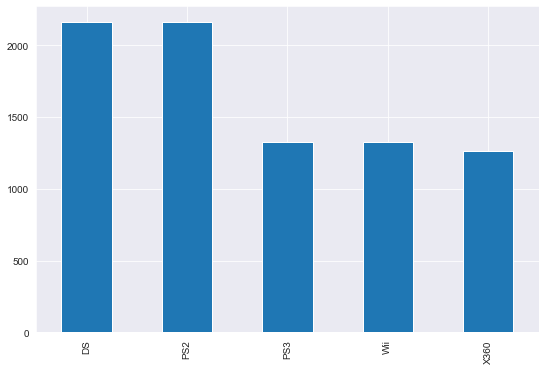

In [37]:
df['Platform'].value_counts().head().plot(kind='bar', figsize=(9,6))

Vamos analisar as médias dessas plataformas. 

In [38]:
df[df['Platform']=='DS'].mean() # Desempenho do Nintendo DS

Rank            9637.462321
Year            2008.184466
NA_Sales           0.180633
EU_Sales           0.089991
JP_Sales           0.081170
Other_Sales        0.027984
Global_Sales       0.380254
dtype: float64

In [40]:
df[df['Platform']=='PS2'].mean() # Desempenho do PlayStation 2

Rank            7477.633966
Year            2004.621934
NA_Sales           0.270171
EU_Sales           0.157006
JP_Sales           0.064415
Other_Sales        0.089514
Global_Sales       0.581046
dtype: float64

In [41]:
df[df['Platform']=='PS3'].mean() # Desempenho do PlayStation 3

Rank            6793.054929
Year            2010.747931
NA_Sales           0.295154
EU_Sales           0.258623
JP_Sales           0.060188
Other_Sales        0.106795
Global_Sales       0.720722
dtype: float64

In [42]:
df[df['Platform']=='Wii'].mean() # Desempenho do WII

Rank            7730.774340
Year            2008.910943
NA_Sales           0.383177
EU_Sales           0.202551
JP_Sales           0.052340
Other_Sales        0.060838
Global_Sales       0.699404
dtype: float64

In [43]:
df[df['Platform']=='X360'].mean() # Desempenho do X360

Rank            6692.528063
Year            2009.814229
NA_Sales           0.475138
EU_Sales           0.221802
JP_Sales           0.009826
Other_Sales        0.067621
Global_Sales       0.774672
dtype: float64

Agora vamos como estão as relação de venda entre as regiões, utilizando o **"lmplot()"**. 

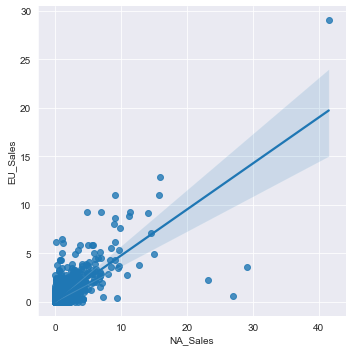

In [48]:
sns.lmplot(x='NA_Sales', y='EU_Sales', data=df)

As vendas na **América do Norte** possuem pouca influencia nas vendas da **Europa**.

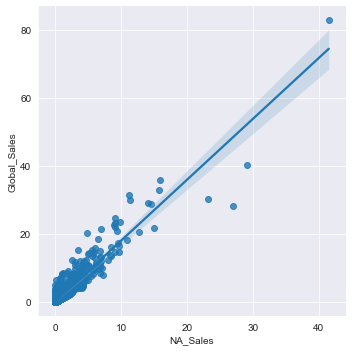

In [8]:
sns.set_style('darkgrid')
sns.lmplot(x='NA_Sales', y='Global_Sales', data=df)

Já quando relacionamos as vendas na América do Norte com relação as venda globais, vemos que há uma boa influência norte americana. 

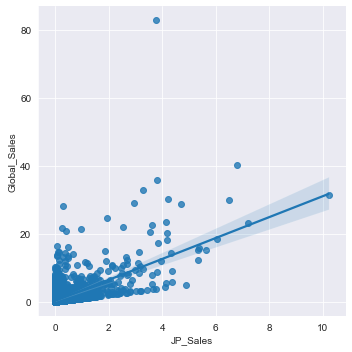

In [9]:
sns.lmplot(x='JP_Sales', y='Global_Sales', data=df)

Nota-se que o mercados japones, tambem possui um influencia significativa no mercado global. 

# Conclussão:
O presente trabalho teve como objetivo realizar uma análise exploratória a respeito dos dados de vendas de vídeos games ao longo de décadas, e assim conseguir visualizar informações que auxiliaram na tomada de decisão em diferentes contextos de negócio. 
Estarei disponibilizando o rascunho do projeto, com algumas análises a mais, que não foram colocadas no projeto por questão de prioridade. 